# Proyecto Mi Primer Algoritmo ML

In [2]:
# Importacion de Librerias
# Registro y Depuración
import logging

# Manejo de Datos y Análisis
import pandas as pd
import numpy as np

# Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline, nos devuelve una matriz formada por numeros reales unicamente
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # Preprocesamiento
from sklearn.impute import SimpleImputer # Preprocesamiento, para trabajar con los valores incompletos dentro del dataset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.model_selection import train_test_split # División de Datos Test / Train
from sklearn.linear_model import LogisticRegression # Modelado - Logistic Regression Model

#Metricas
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    accuracy_score #Para comparar la precision de nuestro modelo
)
from sklearn.inspection import permutation_importance


# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)



### 1. Data loading

Objective: Obtain the data from source and get a first glimpse of their properties and presentation


In [ ]:
df_raw = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep=';')
df_raw.info()
df_raw.sample(10, random_state= 2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4479,58,retired,married,basic.4y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
24230,51,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8307,43,admin.,married,high.school,no,yes,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4824,31,admin.,married,high.school,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
12201,41,blue-collar,married,basic.6y,no,no,no,telephone,jul,wed,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1,no
20123,36,housemaid,married,basic.6y,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
11995,44,admin.,married,university.degree,unknown,yes,yes,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,no
9514,45,admin.,married,university.degree,no,yes,no,telephone,jun,mon,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
20217,48,entrepreneur,married,university.degree,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
8739,22,services,single,high.school,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no



### 2. Data preprocessing

Objectives: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled


In [11]:
df_baking = df_raw.copy()
df_baking = df_raw.drop(['contact','month','day_of_week','day_of_week','pdays','previous','poutcome', 'duration'],axis=1)
df_baking['job'] = df_baking['job'].astype('category')
df_baking['marital'] = df_baking['marital'].astype('category')
df_baking['education'] = df_baking['education'].astype('category')
df_baking['default'] = df_baking['default'].astype('category')
df_baking['housing'] = df_baking['housing'].astype('category')
df_baking['loan'] = df_baking['loan'].astype('category')
df_baking['y'] = df_baking['y'].astype('category')



df_baking.info()
df_baking.sample(10, random_state=2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   campaign        41188 non-null  int64   
 8   emp.var.rate    41188 non-null  float64 
 9   cons.price.idx  41188 non-null  float64 
 10  cons.conf.idx   41188 non-null  float64 
 11  euribor3m       41188 non-null  float64 
 12  nr.employed     41188 non-null  float64 
 13  y               41188 non-null  category
dtypes: category(7), float64(5), int64(2)
memory usage: 2.5 MB


,age,job,marital,education,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4479,58,retired,married,basic.4y,unknown,no,no,1,1.1,93.994,-36.4,4.856,5191.0,yes
24230,51,entrepreneur,married,university.degree,no,yes,no,1,-0.1,93.200,-42.0,4.191,5195.8,no
8307,43,admin.,married,high.school,no,yes,no,2,1.4,94.465,-41.8,4.864,5228.1,no
4824,31,admin.,married,high.school,no,no,no,2,1.1,93.994,-36.4,4.858,5191.0,no
12201,41,blue-collar,married,basic.6y,no,no,no,5,1.4,93.918,-42.7,4.956,5228.1,no
20123,36,housemaid,married,basic.6y,no,no,no,2,1.4,93.444,-36.1,4.965,5228.1,no
11995,44,admin.,married,university.degree,unknown,yes,yes,4,1.4,94.465,-41.8,4.955,5228.1,no
9514,45,admin.,married,university.degree,no,yes,no,5,1.4,94.465,-41.8,4.961,5228.1,no
20217,48,entrepreneur,married,university.degree,no,yes,no,1,1.4,93.444,-36.1,4.965,5228.1,no
8739,22,services,single,high.school,no,no,no,1,1.4,94.465,-41.8,4.864,5228.1,no


In [13]:
display(df_baking.describe(include='number').T)
display(df_baking.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
y,41188,2,no,36548


In [12]:
df = df_baking.copy()



### 3. Exploratory Data Analysis - Logistic Regression Model

Objective: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods


In [14]:
df_train, df_test = train_test_split(df, random_state=2025,test_size=0.2,stratify=df['y'])
df_train = df_train.reset_index(drop=True)


In [15]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.024097,10.412035,17.000,32.000,38.000,47.000,98.000
campaign,32950.0,2.557269,2.769918,1.000,1.000,2.000,3.000,56.000
emp.var.rate,32950.0,0.077159,1.572547,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,32950.0,93.573272,0.579627,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,32950.0,-40.518501,4.632317,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,32950.0,3.616255,1.735786,0.634,1.344,4.857,4.961,5.045
nr.employed,32950.0,5166.924395,72.284270,4963.600,5099.100,5191.000,5228.100,5228.100


,count,unique,top,freq
job,32950,12,admin.,8406
marital,32950,4,married,19931
education,32950,8,university.degree,9766
default,32950,3,no,26085
housing,32950,3,yes,17268
loan,32950,3,no,27203
y,32950,2,no,29238


Analisis univariado
- Vemos un sesgo positivo para la variable independiente Age

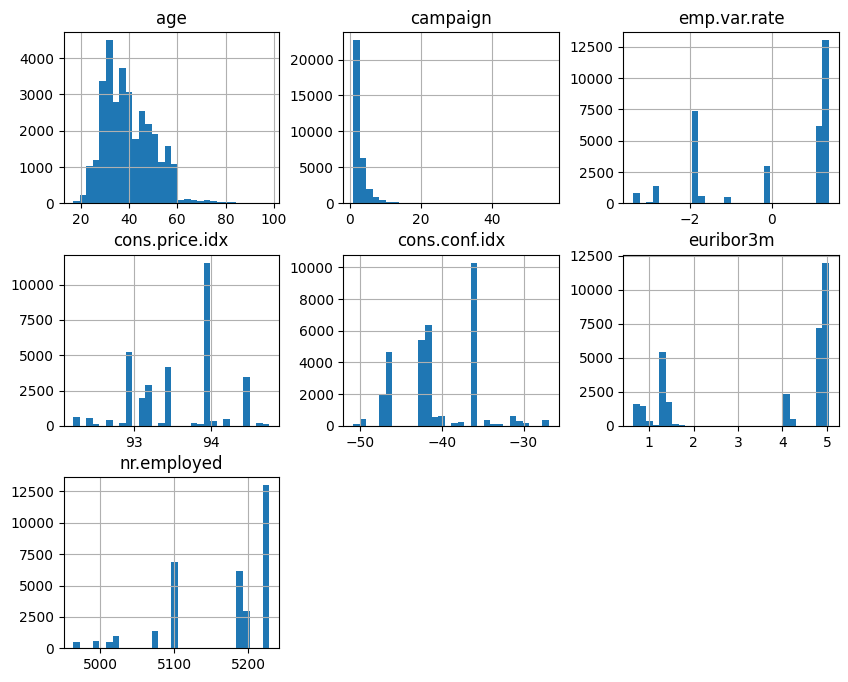

In [ ]:
df_train.hist(bins=30, figsize=(10, 8))
plt.show()

- Análisis univariado de variables categóricas

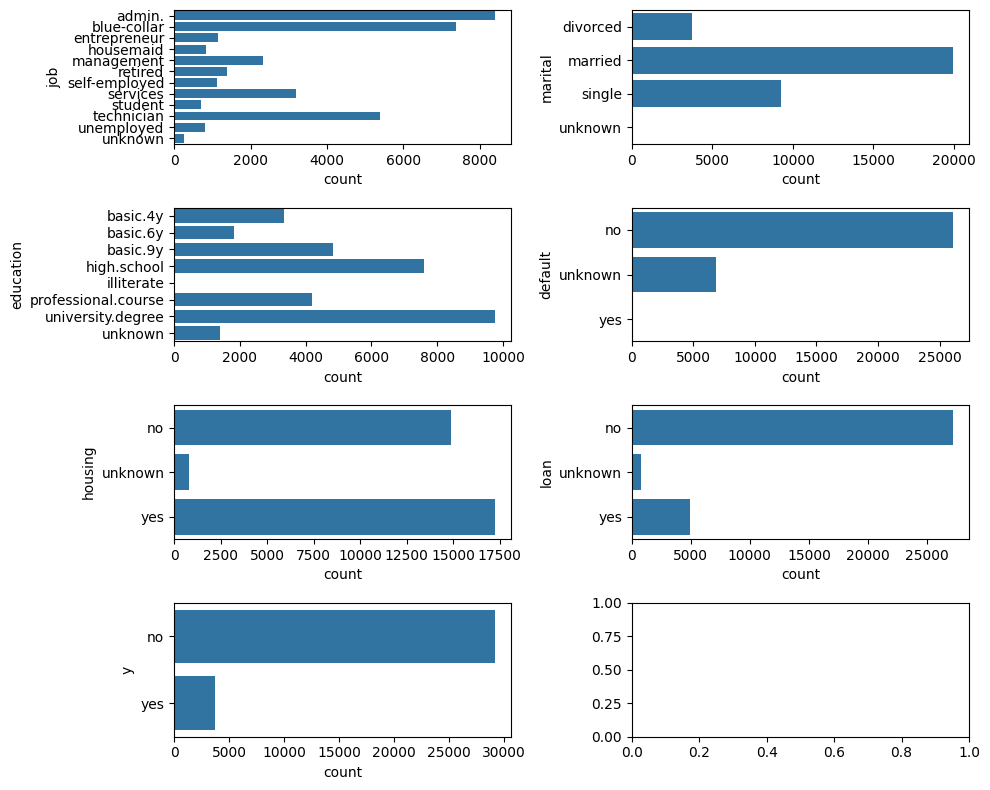

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 8))  # Ajustar el tamaño de la figura

sns.countplot(data=df_train, y='job', ax=ax[0,0])
sns.countplot(data=df_train, y='marital', ax=ax[0,1])
sns.countplot(data=df_train, y='education', ax=ax[1,0])
sns.countplot(data=df_train, y='default', ax=ax[1,1])
sns.countplot(data=df_train, y='housing', ax=ax[2,0])
sns.countplot(data=df_train, y='loan', ax=ax[2,1])
sns.countplot(data=df_train, y='y', ax=ax[3,0])

plt.tight_layout()
plt.show()

- Analisis bivariado

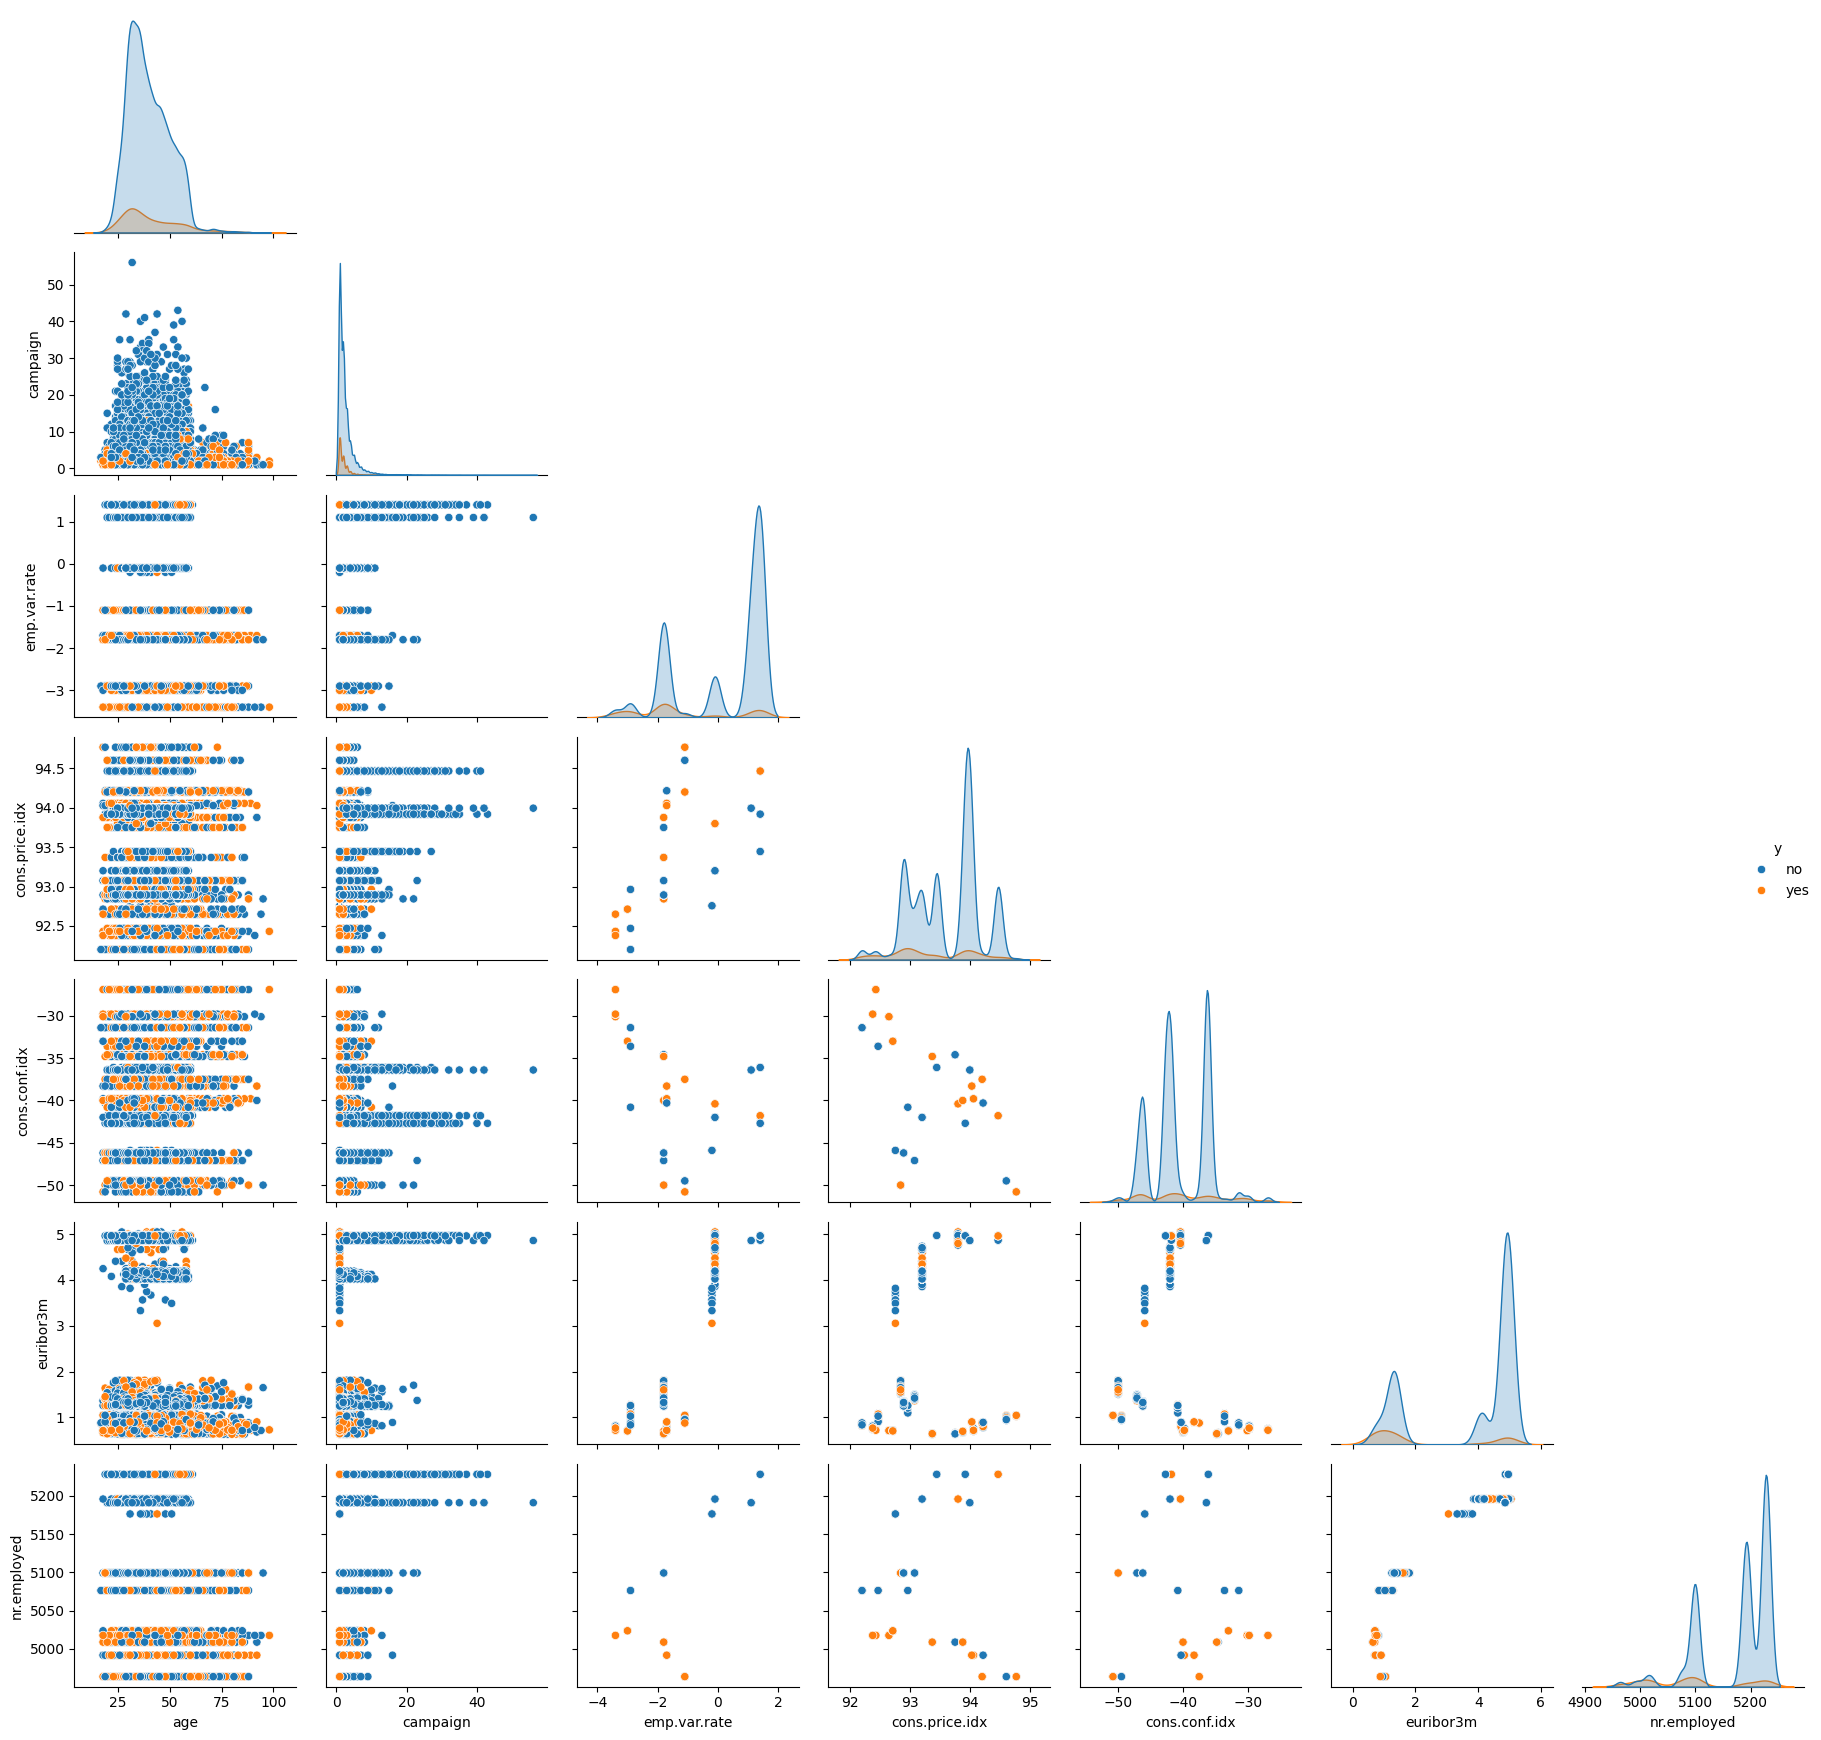

In [ ]:
sns.pairplot(data=df_train, hue='y', corner=True)
plt.tight_layout()
plt.show()

- Analisis univariado de variables categoricas:
- - La mayoria de personas contactadas que tomaron un Certificado a largo plazo no tenian alguna situacion financiera previa, hipotecas, prestamos, default....

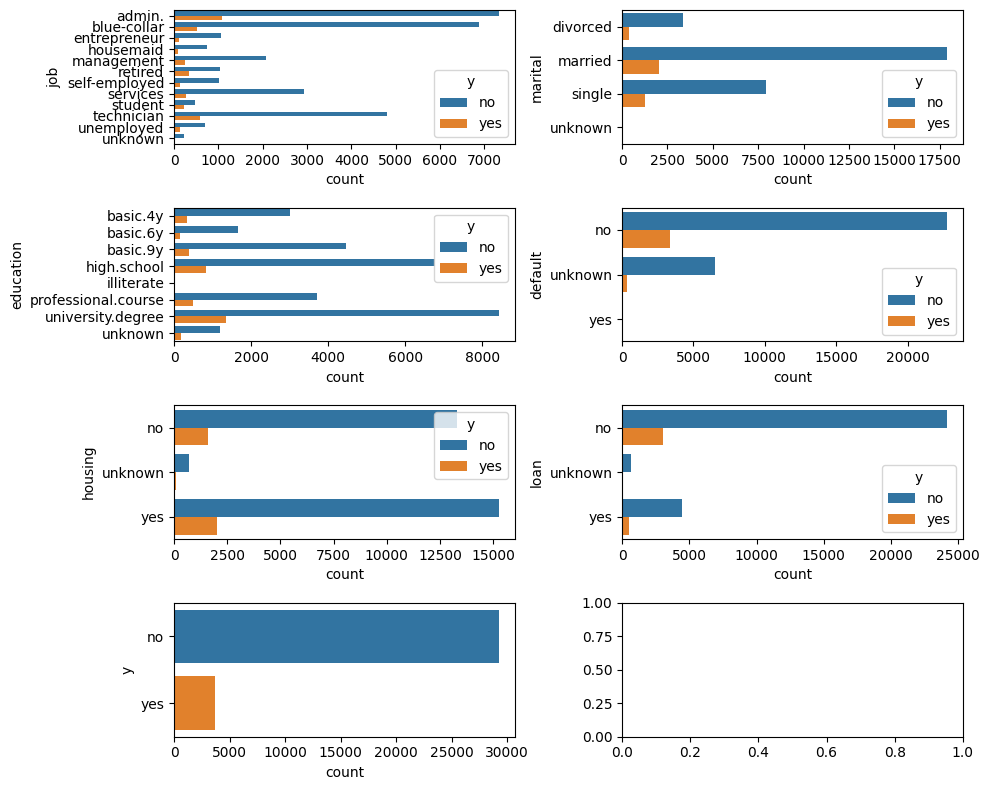

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 8))  # Ajustar el tamaño de la figura


sns.countplot(data=df_train, y='job', hue = 'y', ax=ax[0,0])
sns.countplot(data=df_train, y='marital', hue = 'y', ax=ax[0,1])
sns.countplot(data=df_train, y='education', hue = 'y',ax=ax[1,0])
sns.countplot(data=df_train, y='default', hue = 'y',ax=ax[1,1])
sns.countplot(data=df_train, y='housing',hue = 'y', ax=ax[2,0])
sns.countplot(data=df_train, y='loan',hue = 'y', ax=ax[2,1])
sns.countplot(data=df_train, y='y',hue = 'y', ax=ax[3,0])


plt.tight_layout()
plt.show()

- Correalaciones

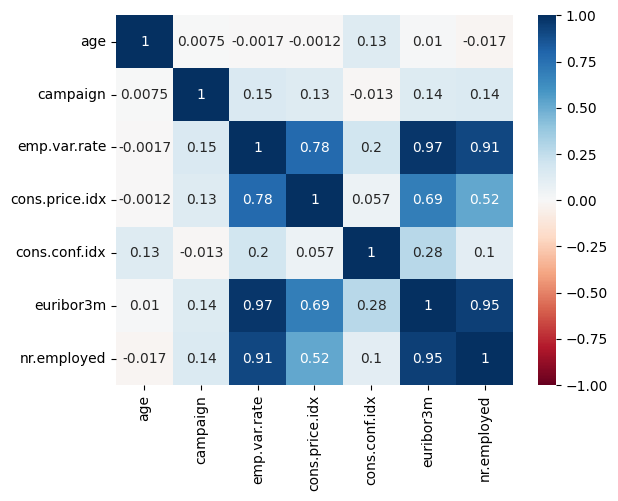

In [ ]:
sns.heatmap(data=df_train.select_dtypes('number').corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

### 3. Machine Learning

In [ ]:
X_train = df_train.drop(['y'], axis = 1)
y_train = df_train['y']
display(X_train) # una matrix
display(y_train) # vector

,age,job,marital,education,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,35,technician,married,professional.course,no,no,yes,2,1.4,93.918,-42.7,4.960,5228.1
1,30,technician,married,basic.9y,no,yes,no,1,1.4,93.918,-42.7,4.963,5228.1
2,27,blue-collar,single,basic.4y,no,yes,no,5,1.4,93.918,-42.7,4.962,5228.1
3,59,retired,married,basic.4y,unknown,no,yes,3,1.4,94.465,-41.8,4.959,5228.1
4,34,blue-collar,married,basic.9y,no,yes,no,2,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,33,services,married,high.school,no,yes,no,5,1.4,93.918,-42.7,4.961,5228.1
32946,56,housemaid,married,basic.4y,no,no,no,2,1.1,93.994,-36.4,4.858,5191.0
32947,49,unemployed,married,high.school,no,no,no,1,-3.4,92.379,-29.8,0.768,5017.5
32948,36,technician,married,professional.course,no,yes,no,2,-1.8,92.893,-46.2,1.327,5099.1


,y
0,no
1,no
2,no
3,no
4,no
...,...
32945,no
32946,no
32947,yes
32948,no


In [64]:
#Pipeline
#Conversion para la variable dependiente "y"
label_encoder = LabelEncoder() #Va a convertir No y Yes en 0 y 1 pero recordando sus valores No=0, Yes=1
y_train_enc = label_encoder.fit_transform(y_train)
y_train_enc

array([0, 0, 0, ..., 1, 0, 0])

In [77]:
#Conversion para las variables independientes X, numericas y categoricas
num_cols = X_train.select_dtypes('number').columns #Columnas numericas
cat_cols = X_train.select_dtypes('category').columns #Columnas categoricas

#Procesador numerico,  Imputamos por la Media los valores faltantes
num_proc = Pipeline(steps=[('imputer', SimpleImputer(strategy= 'mean'))])
#Procesador categorico,
cat_proc = Pipeline(steps=[('imputer', SimpleImputer(strategy= 'most_frequent')), #Imputamos por Frecuencia los valores faltantes
                           ('onehotenc', OneHotEncoder(drop='first'))]) #Se tranforman los valores categoricos a numericos

#Agregamos ambos procesadores en uno solo
processor = ColumnTransformer(transformers=[
    ('cat',cat_proc, cat_cols), ('num', num_proc, num_cols)
])

In [79]:
clf_lr = Pipeline(steps = [
    ('proc', processor),
    ('lreg', LogisticRegression())
])

In [80]:
clf_lr.fit(X_train, y_train_enc)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('proc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('lreg', LogisticRegression())])

In [83]:
y_hat = clf_lr.predict(X_train)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
print(f'Accuracy: {accuracy_score(y_train_enc, y_hat):2f}')

Accuracy: 0.887284


### El modelo tiene un porcentaje de precision del 88.7%